In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# text processing and model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5572   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃          ┃    ┃      ┃          ┃            ┃         ┃            ┃ chars per  ┃ words per  ┃ total      ┃  │
│ ┃ column   ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min     ┃ max        ┃ row        ┃ row        ┃ words      ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Category │  0 │    0 │ ham      │ spam       │ ham     │ spam       │       3.13 │          1 │       5572 │  │
│ │ Message  │  0 │    0 │ Ok       │ For me the │ #ERROR! │ â¦ we r    │       80.5 │         16 │      87265 │  │
│ │          │    │      │          │ love       │         │ stayin     │            │            │            │  │
│ │          │    │      │          │ should     │         │ here an    │            │            │            │  │
│ │          │    │      │          │ start with │         │ extra      │            │            │            │  │
│ │          │    │      │          │ attraction │         │ week, back │            │            │            │  │
│ │          │    │      │          │ .i should  │         │ next wed.  │            │            │            │  │
│ │          │    │      │          │ feel that  │         │ How did we │            │            │            │  │
│ │          │    │      │          │ I need her │         │ do in the  │            │            │            │  │
│ │          │    │      │          │ every time │         │ rugby this │            │            │            │  │
│ │          │    │      │          │ around     │         │ weekend?   │            │            │            │  │
│ │          │    │      │          │ me.she     │         │ Hi to and  │            │            │            │  │
│ │          │    │      │          │ should be  │         │ and , c u  │            │            │            │  │
│ │          │    │      │          │ the first  │         │ soon "     │            │            │            │  │
│ │          │    │      │          │ thing      │         │            │            │            │            │  │
│ │          │    │      │          │ which      │         │            │            │            │            │  │
│ │          │    │      │          │ comes in   │         │            │            │            │            │  │
│ │          │    │      │          │ my         │         │            │            │            │            │  │
│ │          │    │      │          │ thoughts.I │         │            │            │            │            │  │
│ │          │    │      │          │ would      │         │            │            │            │            │  │
│ │          │    │      │          │ start the  │         │            │            │            │            │  │
│ │          │    │      │          │ day and    │     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.shape

(5572, 2)

In [18]:
# Splitting the data into features (X) and target (y), then into training and testing sets.
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 4457
Testing samples: 1115


In [19]:
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB(alpha=0.1))
])

# Training the model on the training data
model_pipeline.fit(X_train, y_train)

train_preds = model_pipeline.predict(X_train)
print("Training Accuracy:", round(accuracy_score(y_train, train_preds)*100, 2), "%")

Training Accuracy: 99.82 %


Test Accuracy: 98.74 %

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.98      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



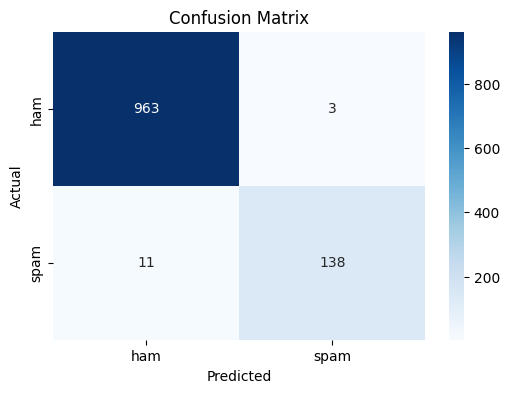

In [20]:
# Evaluating model performance on the test set

y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2), "%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
"""
Streamlit interface
st.title("Email Spam Detection System")
st.markdown("Enter your email message below and click **Check** to determine if it is spam.")

# User input text area
user_message = st.text_area("Enter your message here:")

if st.button("Check"):
    if user_message.strip() == "":
        st.error("Please enter a message to analyze.")
    else:
        prediction = model_pipeline.predict([user_message])[0]
        if prediction.lower() == "spam":
            st.error("The message is **spam**.")
        else:
            st.success("The message is **legitimate (not spam)**.")

        # Display a pie chart for the dataset distribution
        fig, ax = plt.subplots()
        ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#99ff99'])
        ax.set_title("Dataset Distribution: Spam vs. Legitimate")
        st.pyplot(fig)
""" 